In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import linear_model, model_selection
from sklearn.linear_model import LogisticRegression
import matplotlib as mpl
import seaborn as sns
import xlrd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving Estatica_Dataset.csv to Estatica_Dataset.csv


{'Estatica_Dataset.csv': b'Idalumno,CodAsig,Asignatura,Carrera,Semestre,Convocatoria,Anho,Ciclo,Aprobado,AnhoFirma,1P,2P,Taller,Asistencia,SumProceso,Requisito,1R,2R,NF,1F,2F,3F,Abandono,CantMaterias,Veces recursada\n29,13015,ESTATICA,ELE-PLS13 ,3,2,2022,2,0,0,9,8,5,1,22,1,0,0,0,0,0,0,1,4,0\n40,13015,ESTATICA,MCT-PLS13 ,3,1,2016,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0\n56,13015,ESTATICA,ELE-PLS13 ,3,1,2019,1,1,2018,0,0,0,1,0,1,0,0,2,2,0,0,1,4,0\n77,13015,ESTATICA,ELE-PLS13 ,3,1,2022,1,0,0,17,17,1,1,35,0,0,0,0,0,0,0,1,4,0\n77,13015,ESTATICA,ELE-PLS13 ,3,2,2022,2,1,2022,21,22,7,1,50,1,0,0,5,5,0,0,0,5,1\n170,13015,ESTATICA,MCT-PLS13 ,3,2,2019,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,5,0\n207,13015,ESTATICA,CIV-PLS13 ,3,1,2016,2,0,0,5,0,6,0,11,0,0,0,0,0,0,0,1,5,0\n207,13015,ESTATICA,CIV-PLS13 ,3,1,2017,2,0,0,7,0,2,0,9,0,0,0,0,0,0,0,1,5,1\n208,13015,ESTATICA,CIV-PLS13 ,3,1,2016,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,0\n237,13015,ESTATICA,ELE-PLS13 ,3,2,2021,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,6,0\n248,13015,ESTA

In [6]:
  # Read the whole data from CSV
  data = pd.read_csv("/content/Estatica_Dataset.csv")

  # The column whose values must be predicted
  predict_column = "Abandono"

  # Limit the data in a set of columns. These are
  # the important columns for this test
  study_data = data[["Anho", "Convocatoria", "SumProceso", "Veces recursada", "Abandono", "Materias cursadas"]]

  # Set the features (attributes) and the label
  # for the test. The label is the data we want
  # to predict
  features = np.array(study_data.drop([predict_column], axis=1))
  labels = np.array(data[predict_column])

  # Given the whole read data, split it into a set
  # of trains and tests.
  # Trains: the data used to train the model
  # Tests: the data used to compare the results later
  features_train, features_test, labels_train, labels_test = model_selection.train_test_split(features, labels, test_size = 0.1)

  # Crear un modelo de regresión logística
  logistic = LogisticRegression()

  # Entrenar el modelo con los datos de entrenamiento
  logistic.fit(features_train, labels_train)

  # Predicciones
  predictions = logistic.predict(features_test)

  # Check the accuracy of our model by comparing
  # the results with the expected data (tests)
  accuracy = accuracy_score(labels_test, predictions)

In [7]:
 # Print details
 for i in range(len(predictions)):
    print("features: .........", features_test[i])
    print("expected label: ...", labels_test[i])
    print("predicted label: ..", predictions[i])
    print("-")
print("Accuracy:", (accuracy * 100), "%")

features: ......... [2022    1   15    1    7]
expected label: ... 1
predicted label: .. 1
-
features: ......... [2021    2   17    1    7]
expected label: ... 1
predicted label: .. 1
-
features: ......... [2019    1    0    3    9]
expected label: ... 1
predicted label: .. 1
-
features: ......... [2017    1   42    0    6]
expected label: ... 0
predicted label: .. 0
-
features: ......... [2016    1   18    0    5]
expected label: ... 1
predicted label: .. 1
-
features: ......... [2019    2   47    4    5]
expected label: ... 0
predicted label: .. 0
-
features: ......... [2022    1   21    1    5]
expected label: ... 0
predicted label: .. 1
-
features: ......... [2017    1   46    0    6]
expected label: ... 0
predicted label: .. 0
-
features: ......... [2021    2   20    1    5]
expected label: ... 0
predicted label: .. 1
-
features: ......... [2016    1   12    0    5]
expected label: ... 1
predicted label: .. 1
-
features: ......... [2021    2    0    0    4]
expected label: ... 1
p

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = labels_test
y_pred =  [1 if p > 0.5 else 0 for p in predictions]  # Convert predicted probabilities to binary labels  # Convert predicted probabilities to binary labels

print('Precision score:',precision_score(y_true, y_pred))
print('Recall score:',recall_score(y_true, y_pred))
print('F1 score:',f1_score(y_true, y_pred))

Precision score: 0.8715083798882681
Recall score: 0.8571428571428571
F1 score: 0.8642659279778394


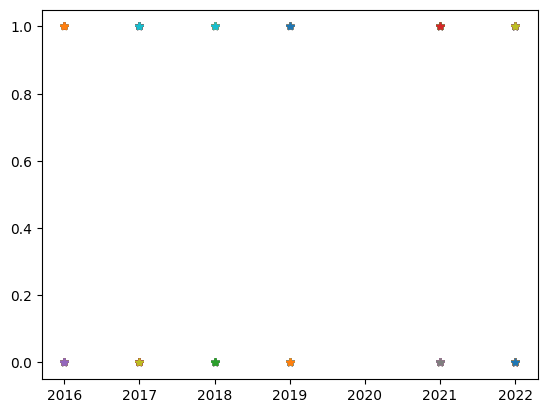

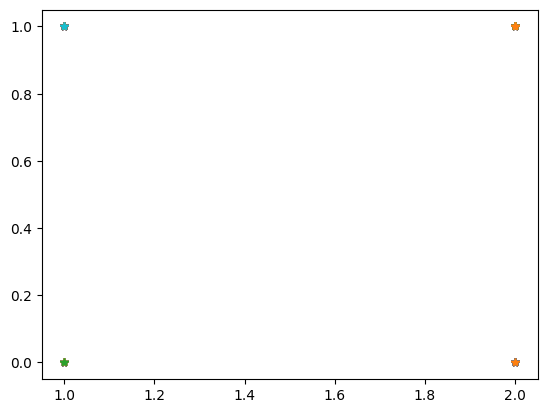

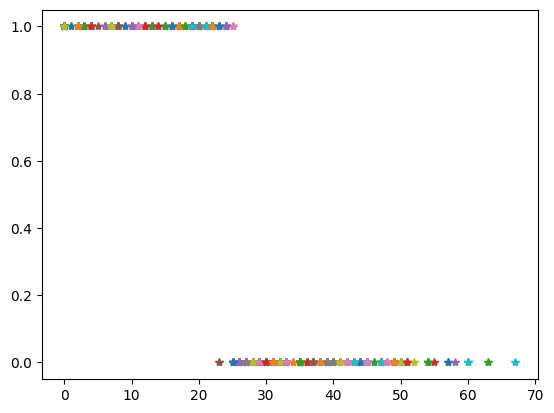

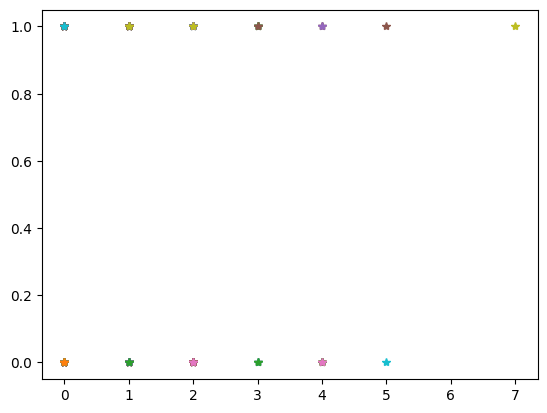

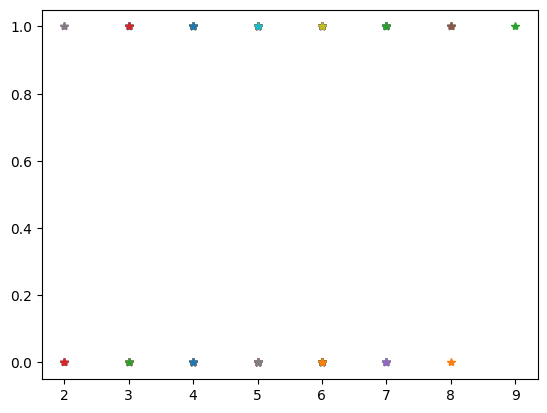

In [9]:
for j in range(0,5):
  for i in range(0,443):
    plt.figure(j)
    plt.plot(np.transpose(features_test[i,j]), predictions[i], '*')

In [10]:
##Abandonos para los distintos casos:
tk16 = 0
contador16 = 0
tk17 = 0
contador17 = 0
tk18 = 0
contador18 = 0
tk19 = 0
contador19 = 0
tk21 = 0
contador21 = 0
tk22 = 0
contador22 = 0
for i in range (0,443):
  if np.transpose(features_test[i,0]) == 2016:
    tk16 = tk16 + predictions[i]
    contador16 = contador16 + 1
  elif np.transpose(features_test[i,0]) == 2017:
    tk17 = tk17 + predictions[i]
    contador17 = contador17 + 1
  elif np.transpose(features_test[i,0]) == 2018:
    tk18 = tk18 + predictions[i]
    contador18 = contador18 + 1
  elif np.transpose(features_test[i,0]) == 2019:
    tk19 = tk19 + predictions[i]
    contador19 = contador19 + 1
  elif np.transpose(features_test[i,0]) == 2021:
    tk21 = tk21 + predictions[i]
    contador21 = contador21 + 1
  elif np.transpose(features_test[i,0]) == 2022:
    tk22 = tk22 + predictions[i]
    contador22 = contador22 + 1
print('Promedio predicho en 2016: ', tk16/contador16 )
print('Promedio predicho en 2017: ', tk16/contador17 )
print('Promedio predicho en 2018: ', tk16/contador18 )
print('Promedio predicho en 2019: ', tk16/contador19 )
print('Promedio predicho en 2021: ', tk16/contador21 )
print('Promedio predicho en 2022: ', tk16/contador22 )


P1 = 0
contadorP1 = 0
P2 = 0
contadorP2 = 0
for i in range (0,443):
  if np.transpose(features_test[i,1]) == 1:
    P1 = P1 + predictions[i]
    contadorP1 = contadorP1 + 1
  elif np.transpose(features_test[i,1]) == 2:
    P2 = P2 + predictions[i]
    contadorP2 = contadorP2 + 1
print('-----------------')
print('Promedio predicho en 1er periodo: ', P1/contadorP1 )
print('Promedio predicho en 2do periodo: ', P2/contadorP2 )

Promedio predicho en 2016:  0.24
Promedio predicho en 2017:  0.2
Promedio predicho en 2018:  0.1875
Promedio predicho en 2019:  0.2
Promedio predicho en 2021:  0.13636363636363635
Promedio predicho en 2022:  0.09917355371900827
-----------------
Promedio predicho en 1er periodo:  0.4046692607003891
Promedio predicho en 2do periodo:  0.4032258064516129
